In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"firdausbagusw","key":"d87f1f895de110a617c543b27eaa7d03"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d jangedoo/utkface-new

 98% 323M/331M [00:02<00:00, 144MB/s]
100% 331M/331M [00:02<00:00, 127MB/s]


In [ ]:
! unzip utkface-new.zip

Streaming output truncated to the last 5000 lines.
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170109004755204.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170111182452832.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170103230340961.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104011329697.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104165020320.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170108230211421.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104022134829.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104023010725.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104172537171.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104201443273.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104204327

In [ ]:
! pip install umap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install imageio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np 
import pandas as pd
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
import umap
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
import imageio
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical


In [ ]:
os.chdir('/content/utkface_aligned_cropped')
os.listdir()

['crop_part1', 'UTKFace']

In [ ]:
os.chdir('crop_part1')
os.listdir()[:5]

['25_1_4_20161220222242243.jpg.chip.jpg',
 '47_1_0_20170104184702870.jpg.chip.jpg',
 '70_1_0_20170110123134893.jpg.chip.jpg',
 '46_0_0_20170104184807318.jpg.chip.jpg',
 '1_0_0_20170110213202543.jpg.chip.jpg']

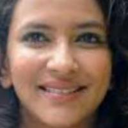

In [ ]:
im =Image.open('25_1_4_20161220222242243.jpg.chip.jpg').resize((128,128))
im

In [ ]:
onlyfiles = os.listdir()
len(onlyfiles)
asian = []
for name in onlyfiles:
    race = name.split('_')[2]
    if race == '2':
        asian.append(name)
onlyfiles = asian

In [ ]:
shuffle(onlyfiles)
age = [i.split('_')[0] for i in onlyfiles]

In [ ]:
class_label = ['17-','18-24','25-34','35-44','45-60','60+']
classes = []
Y_age = []
for i in age:
    i = int(i)
    if i <= 17:
        classes.append(0)
    elif (i>17) and (i<=24):
        classes.append(1)
    elif (i>24) and (i<=34):
        classes.append(2)
    elif (i>34) and (i<=44):
        classes.append(3)
    elif (i>44) and (i<=60):
        classes.append(4)
    elif i>60:
        classes.append(5)
    Y_age.append(i)

In [ ]:
def convertImage(filename):
    face = imageio.imread(filename)
    face = cv2.resize(face, (32, 32))
    return face 
X_data = list(map(convertImage, onlyfiles))

In [ ]:
X = np.squeeze(X_data)
X.shape

(1553, 32, 32, 3)

In [ ]:
X = X.astype('float32')
X /= 255
classes[:10]

[0, 0, 1, 3, 3, 0, 0, 2, 0, 0]

In [ ]:
categorical_labels = to_categorical(classes, num_classes=6)
categorical_labels

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
categorical_labels[:10]

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
(x_train, y_train, y_train_age), (x_test, y_test, y_test_age) = (X[:1100],categorical_labels[:1100], Y_age[:1100]) , (X[1100:] , categorical_labels[1100:], Y_age[1100:])
#(x_valid , y_valid) = (x_test[1000:], y_test[1000:])
#(x_test, y_test) = (x_test[:1000], y_test[:1000])


# Eigenface encoder

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
cv2.cvtColor(x_train[0], cv2.COLOR_BGR2GRAY).shape
x_train_temp = np.array([cv2.cvtColor(x_t, cv2.COLOR_BGR2GRAY).flatten() for x_t in x_train]) 
x_train_temp.shape

(1100, 1024)

In [ ]:
x_train_df = pd.DataFrame(x_train_temp)
x_train_df

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.050447,0.072525,0.097353,0.307235,0.195357,0.204263,0.200341,0.192498,0.211937,0.428055,...,0.193212,0.645624,0.601671,0.423412,0.401694,0.523263,0.368467,0.393192,0.427380,0.460906
1,0.539059,0.703106,0.758969,0.792475,0.792475,0.807714,0.819075,0.843820,0.836702,0.824937,...,0.523553,0.559161,0.530412,0.628282,0.740310,0.540992,0.405769,0.350302,0.491329,0.685843
2,0.155996,0.198357,0.277341,0.367349,0.440631,0.481165,0.550988,0.579294,0.585926,0.604557,...,0.618145,0.704706,0.947008,0.972871,0.920886,0.940090,0.141090,0.439773,0.594655,0.627784
3,0.233016,0.033439,0.109329,0.280655,0.407435,0.463012,0.481808,0.510071,0.535455,0.544471,...,0.329075,0.312408,0.290886,0.340847,0.393961,0.370306,0.417769,0.564082,0.597800,0.583031
4,0.144871,0.106804,0.145098,0.193431,0.321216,0.463859,0.505992,0.541455,0.564941,0.589239,...,0.283992,0.312741,0.398749,0.405322,0.741298,0.762341,0.755671,0.772169,0.781949,0.780620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.176671,0.130616,0.085733,0.120286,0.117537,0.114086,0.107498,0.156973,0.320616,0.442706,...,0.200902,0.156490,0.139506,0.155024,0.098392,0.082706,0.116467,0.132153,0.089016,0.092937
1096,0.949471,0.949471,0.948298,0.944184,0.772459,0.607055,0.534157,0.527055,0.461145,0.359459,...,0.252639,0.280592,0.009902,0.020004,0.018502,0.016157,0.012871,0.000894,0.002302,0.000000
1097,0.078447,0.124839,0.202882,0.281886,0.293776,0.320780,0.327663,0.328110,0.345137,0.364745,...,0.203584,0.231314,0.255761,0.277180,0.307102,0.330059,0.445835,0.285545,0.209953,0.187039
1098,0.944035,0.950875,0.958396,0.505004,0.169494,0.225780,0.274376,0.255812,0.255510,0.255502,...,0.217980,0.159435,0.169690,0.193776,0.183922,0.241431,0.327463,0.357918,0.294624,0.381200


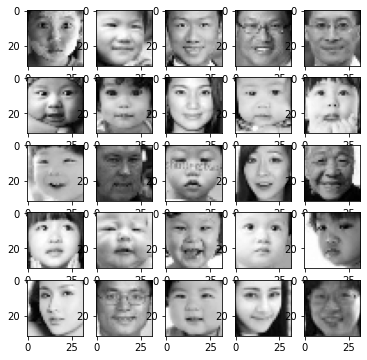

In [ ]:
def plot_faces(pixels):
    fig, axes = plt.subplots(5, 5, figsize=(6, 6))
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.array(pixels)[i].reshape(32, 32), cmap='gray')
    plt.show()
# for x_t in x_train_temp:
#     plot_faces(x_t)
#     break
plot_faces(x_train_df)

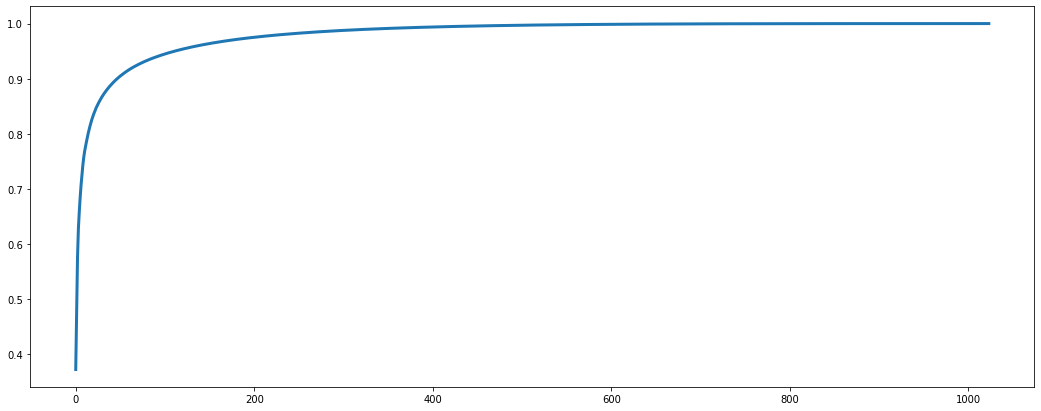

In [ ]:
pca = PCA().fit(x_train_df)
plt.figure(figsize=(18, 7))
plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3)

In [ ]:
representPercesntage = 0.999 # This significantly affects accuracy
#representPercesntage = 0.8
np.where(pca.explained_variance_ratio_.cumsum() > representPercesntage)[0][0:10]

array([633, 634, 635, 636, 637, 638, 639, 640, 641, 642])

In [ ]:
n_com = np.where(pca.explained_variance_ratio_.cumsum() > representPercesntage)[0][0]
pca = PCA(n_components=n_com).fit(x_train_df)
x_train_pca = pca.transform(x_train_df)
x_train_pca.shape
y_train_sklearn = np.array([np.where(yt == 1)[0][0] for yt in y_train])
y_train_sklearn
classifier = SVC().fit(x_train_pca,y_train_sklearn)

In [ ]:
predictions = classifier.predict(x_train_pca)
target_names = [str(l) for l in range(6)]
print(classification_report(y_train_sklearn, predictions, target_names=target_names))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       687
           1       0.98      0.49      0.66        85
           2       0.71      0.82      0.76       140
           3       0.79      0.53      0.63        70
           4       1.00      0.17      0.29        47
           5       0.91      0.68      0.77        71

    accuracy                           0.85      1100
   macro avg       0.88      0.61      0.67      1100
weighted avg       0.86      0.85      0.83      1100



In [ ]:
TruePrediction = 0
for i in range(len(predictions)):
    if predictions[i] == y_train_sklearn[i]:
        TruePrediction += 1
print(f"Accuracy: {TruePrediction/len(predictions)}")

Accuracy: 0.8490909090909091


# Test Data

In [ ]:
# Preprocessing pipeline
x_test_temp = np.array([cv2.cvtColor(x_t, cv2.COLOR_BGR2GRAY).flatten() for x_t in x_test]) 
x_test_df = pd.DataFrame(x_test_temp)
x_test_pca = pca.transform(x_test_df)

predictions = classifier.predict(x_test_pca)

y_test_sklearn = np.array([np.where(yt == 1)[0][0] for yt in y_test])

print(classification_report(y_test_sklearn, predictions))

              precision    recall  f1-score   support

           0       0.79      0.96      0.86       291
           1       0.44      0.10      0.16        40
           2       0.38      0.47      0.42        58
           3       0.27      0.14      0.19        21
           4       0.00      0.00      0.00        15
           5       0.67      0.14      0.24        28

    accuracy                           0.70       453
   macro avg       0.42      0.30      0.31       453
weighted avg       0.65      0.70      0.65       453



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
TruePrediction = 0
loss = 0
N = len(predictions)
for i in range(len(predictions)):
    if predictions[i] == y_test_sklearn[i]:
        TruePrediction += 1
    else:
        loss += (y_test_sklearn[i] - predictions[i])**2
print(f"Accuracy: {TruePrediction/len(predictions)}")
print(f"Loss: {(loss/N)**0.5}")

Accuracy: 0.6997792494481236
Loss: 1.4351315789873145


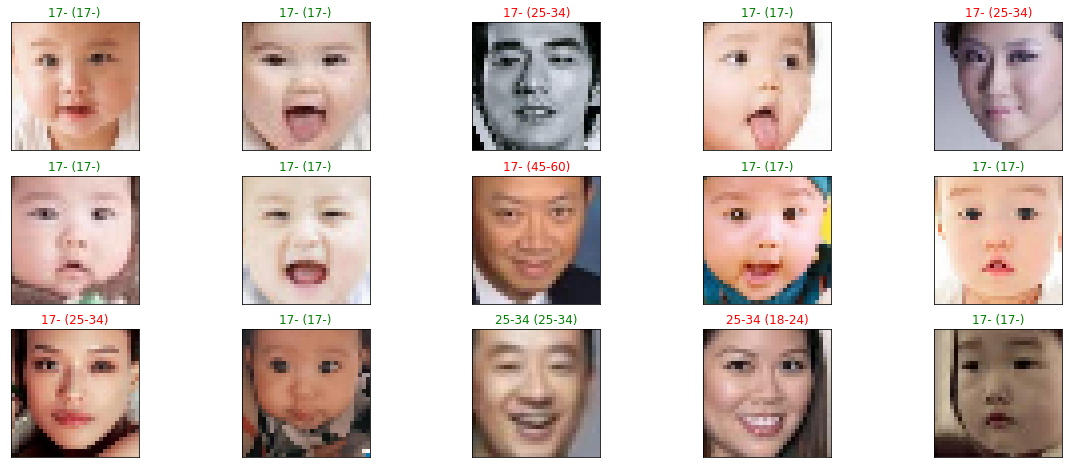

In [ ]:
labels = class_label


# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = predictions[index]
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

### SVC Linear

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       291
           1       0.33      0.38      0.35        40
           2       0.26      0.28      0.27        58
           3       0.14      0.14      0.14        21
           4       0.14      0.13      0.14        15
           5       0.76      0.46      0.58        28

    accuracy                           0.70       453
   macro avg       0.42      0.38      0.40       453
weighted avg       0.70      0.70      0.70       453

Accuracy: 0.695364238410596
Loss: 1.0568811629007686


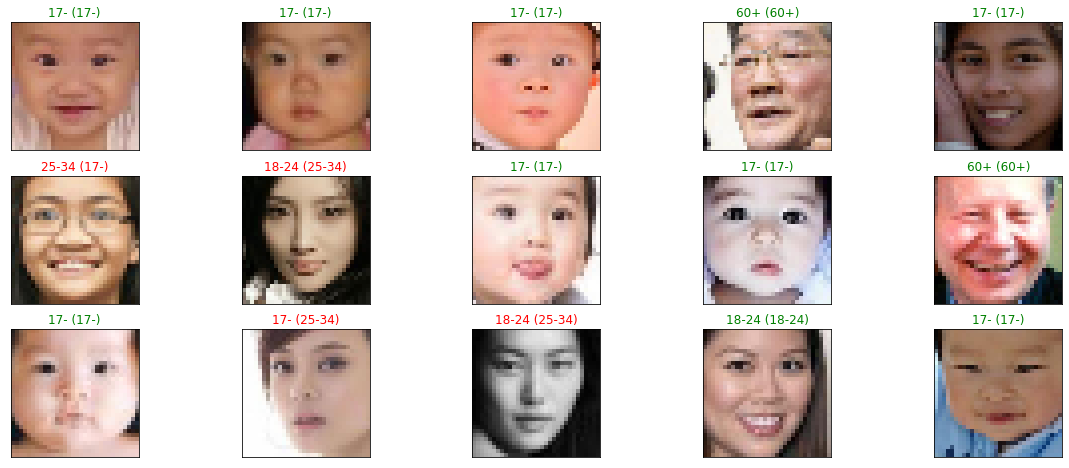

In [ ]:
#SVC linear

classifier = SVC(kernel = 'linear').fit(x_train_pca,y_train_sklearn)
# Preprocessing pipeline
x_test_temp = np.array([cv2.cvtColor(x_t, cv2.COLOR_BGR2GRAY).flatten() for x_t in x_test]) 
x_test_df = pd.DataFrame(x_test_temp)
x_test_pca = pca.transform(x_test_df)

predictions = classifier.predict(x_test_pca)

y_test_sklearn = np.array([np.where(yt == 1)[0][0] for yt in y_test])

print(classification_report(y_test_sklearn, predictions))

TruePrediction = 0
loss = 0
N = len(predictions)
for i in range(N):
    if predictions[i] == y_test_sklearn[i]:
        TruePrediction += 1
    else:
        loss += (y_test_sklearn[i] - predictions[i])**2
print(f"Accuracy: {TruePrediction/len(predictions)}")
print(f"Loss: {(loss/N)**0.5}")

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = predictions[index]
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       291
           1       0.00      0.00      0.00        40
           2       0.13      0.90      0.22        58
           3       0.13      0.24      0.17        21
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00        28

    accuracy                           0.13       453
   macro avg       0.04      0.19      0.06       453
weighted avg       0.02      0.13      0.04       453

Accuracy: 0.12582781456953643
Loss: 1.8551283254138402


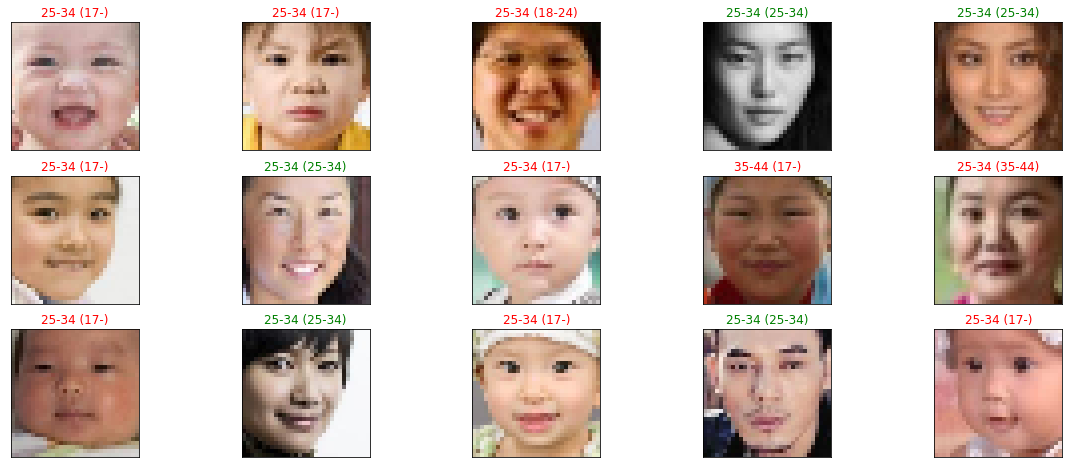

In [ ]:
#SVC poly

classifier = SVC(kernel = 'poly', gamma='auto', class_weight='balanced').fit(x_train_pca,y_train_sklearn)
# Preprocessing pipeline
x_test_temp = np.array([cv2.cvtColor(x_t, cv2.COLOR_BGR2GRAY).flatten() for x_t in x_test]) 
x_test_df = pd.DataFrame(x_test_temp)
x_test_pca = pca.transform(x_test_df)

predictions = classifier.predict(x_test_pca)

y_test_sklearn = np.array([np.where(yt == 1)[0][0] for yt in y_test])

print(classification_report(y_test_sklearn, predictions))

TruePrediction = 0
loss = 0
N = len(predictions)
for i in range(N):
    if predictions[i] == y_test_sklearn[i]:
        TruePrediction += 1
    else:
        loss += (y_test_sklearn[i] - predictions[i])**2
print(f"Accuracy: {TruePrediction/len(predictions)}")
print(f"Loss: {(loss/N)**0.5}")


# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = predictions[index]
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=6, random_state=2).fit(x_train_pca)
kmeans.labels_


array([1, 5, 1, ..., 0, 3, 2], dtype=int32)

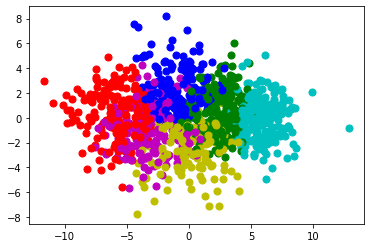

In [ ]:
results = {
    i:[] for i in range(6)
}

colors = ['r','g','b','y','m','c']
for i in range(len(x_train_pca)):
    pc1, pc2 = x_train_pca[i][0:2]
    label = kmeans.labels_[i]
    results[label].append(y_train_sklearn[i])
    plt.scatter(pc1, pc2, c= colors[label],
            s=50, cmap='viridis');
    

In [ ]:
from collections import Counter
sumCounter = Counter()
for k,v in results.items():
    print(f"Label {k}")
    print(Counter(v))
    sumCounter += Counter(v)

Label 0
Counter({0: 69, 2: 37, 5: 31, 3: 30, 4: 18, 1: 16})
Label 1
Counter({0: 175, 1: 12, 2: 10, 5: 8, 4: 3, 3: 3})
Label 2
Counter({0: 103, 2: 21, 3: 16, 5: 16, 1: 8, 4: 6})
Label 3
Counter({0: 78, 2: 21, 1: 12, 4: 11, 3: 11, 5: 6})
Label 4
Counter({0: 55, 2: 46, 1: 34, 3: 9, 4: 8, 5: 7})
Label 5
Counter({0: 207, 2: 5, 5: 3, 1: 3, 4: 1, 3: 1})


In [ ]:
sumCounter

Counter({3: 70, 5: 71, 2: 140, 4: 47, 0: 687, 1: 85})

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train_pca, y_train_age)
reg.score(x_train_pca, y_train_age)

predictions = reg.predict(x_train_pca)

accuracy = 0
for i in range(len(predictions)):
    print(f"Prediction: {predictions[i]}")
    print(f"Real: {y_train_age[i]}")
    
    if predictions[i] <= 17:
        Class = 0
    elif (predictions[i]>17) and (predictions[i]<=24):
        Class = 1
    elif (predictions[i]>24) and (predictions[i]<=34):
        Class = 2
    elif (predictions[i]>34) and (predictions[i]<=44):
        Class = 3
    elif (predictions[i]>44) and (predictions[i]<=60):
        Class = 4
    elif predictions[i]>60:
        Class = 5
    if Class == y_train_sklearn[i]:
        accuracy += 1
accuracy /= len(predictions)
print(f"Train accuracy {accuracy}")

predictions = reg.predict(x_test_pca)
predictions_class = []
accuracy = 0
for i in range(len(predictions)):
    print(f"Prediction: {predictions[i]}")
    print(f"Real: {y_test_age[i]}")
    
    if predictions[i] <= 17:
        Class = 0
    elif (predictions[i]>17) and (predictions[i]<=24):
        Class = 1
    elif (predictions[i]>24) and (predictions[i]<=34):
        Class = 2
    elif (predictions[i]>34) and (predictions[i]<=44):
        Class = 3
    elif (predictions[i]>44) and (predictions[i]<=60):
        Class = 4
    elif predictions[i]>60:
        Class = 5
    if Class == y_test_sklearn[i]:
        accuracy += 1
    predictions_class.append(Class)
accuracy /= len(predictions)
print(f"Test accuracy {accuracy}")

Prediction: 3.966489791870117
Real: 4
Prediction: 12.671134948730469
Real: 4
Prediction: 21.083616256713867
Real: 19
Prediction: 43.046424865722656
Real: 39
Prediction: 30.37070655822754
Real: 36
Prediction: 7.960018157958984
Real: 1
Prediction: -9.018428802490234
Real: 3
Prediction: 37.51062774658203
Real: 33
Prediction: -4.369634628295898
Real: 1
Prediction: -6.369087219238281
Real: 5
Prediction: -15.1331787109375
Real: 2
Prediction: 54.96464538574219
Real: 62
Prediction: 7.349515914916992
Real: 3
Prediction: 21.12494468688965
Real: 21
Prediction: 64.8969497680664
Real: 86
Prediction: -4.590816497802734
Real: 1
Prediction: -3.161540985107422
Real: 1
Prediction: 2.939602851867676
Real: 2
Prediction: 2.614762306213379
Real: 2
Prediction: 10.440958023071289
Real: 3
Prediction: 27.299861907958984
Real: 25
Prediction: 22.088104248046875
Real: 27
Prediction: -3.3603343963623047
Real: 2
Prediction: 22.074350357055664
Real: 25
Prediction: 23.798736572265625
Real: 32
Prediction: 5.25940418243

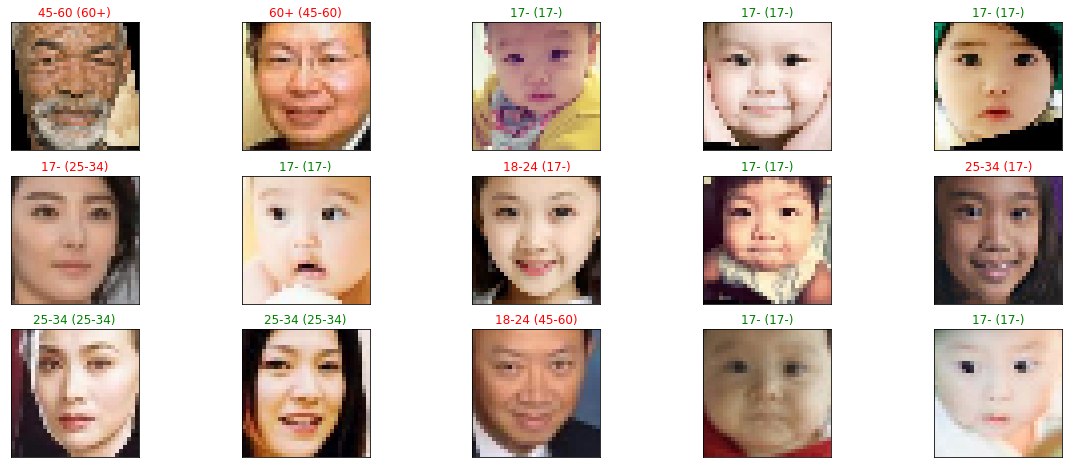

In [ ]:
# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = predictions_class[index]
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [ ]:
clf = RandomForestClassifier(max_depth=100, random_state=100)
clf.fit(x_train_pca, y_train_sklearn)

RandomForestClassifier(max_depth=100, random_state=100)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       687
           1       1.00      1.00      1.00        85
           2       1.00      1.00      1.00       140
           3       1.00      1.00      1.00        70
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        71

    accuracy                           1.00      1100
   macro avg       1.00      1.00      1.00      1100
weighted avg       1.00      1.00      1.00      1100

Accuracy: 1.0
Loss: 0.0
              precision    recall  f1-score   support

           0       0.65      0.98      0.78       291
           1       0.50      0.03      0.05        40
           2       0.31      0.09      0.14        58
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00        15
           5       1.00      0.04      0.07        28

    accuracy                           0.64       453

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


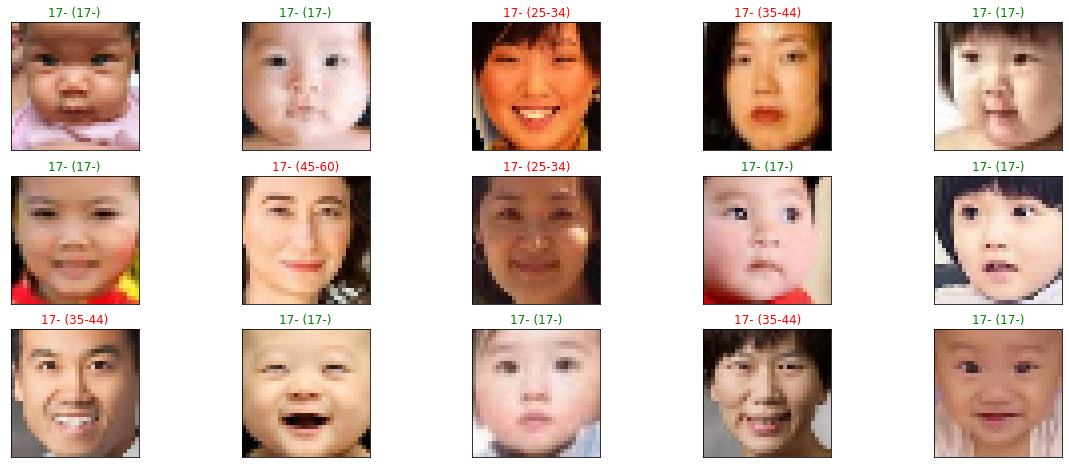

In [ ]:
predictions = clf.predict(x_train_pca)
print(classification_report(y_train_sklearn, predictions))

TruePrediction = 0
loss = 0
N = len(predictions)
for i in range(N):
    if predictions[i] == y_train_sklearn[i]:
        TruePrediction += 1
    else:
        loss += (y_train_sklearn[i] - predictions[i])**2
print(f"Accuracy: {TruePrediction/len(predictions)}")
print(f"Loss: {(loss/N)**0.5}")

predictions = clf.predict(x_test_pca)
print(classification_report(y_test_sklearn, predictions))

TruePrediction = 0
loss = 0
N = len(predictions)
for i in range(N):
    if predictions[i] == y_test_sklearn[i]:
        TruePrediction += 1
    else:
        loss += (y_test_sklearn[i] - predictions[i])**2
print(f"Accuracy: {TruePrediction/len(predictions)}")
print(f"Loss: {(loss/N)**0.5}")

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = predictions[index]
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

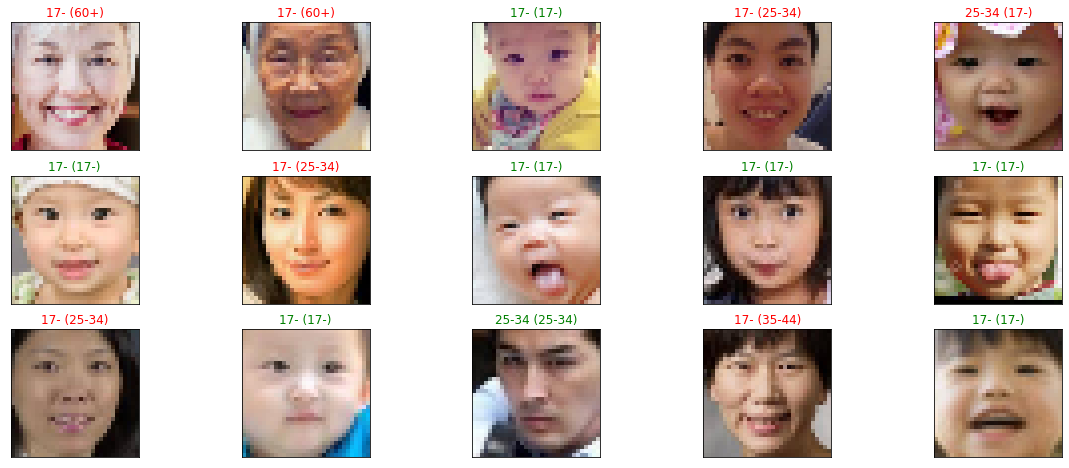

In [ ]:
# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = predictions[index]
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()